In [441]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt
%matplotlib inline

In [442]:
os.getcwd()

'C:\\Users\\Mitul\\Desktop'

In [443]:
os.chdir('C:\\Users\\Mitul\\Desktop')

In [444]:
bank = pd.read_csv('bank_marketing_part1_Data.csv')

In [210]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


# 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [211]:
bank.shape

(210, 7)

There are 210 rows while 7 column present in dataset.

In [212]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


All the variables are of nature of float 64. None of the variables are categorical in nature.

In [213]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

There are no null values in the dataset. 

In [214]:
bank.duplicated().sum()

0

There are no duplicate records in the dataset.

In [215]:
bank.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


# Checking of presence of outliers 

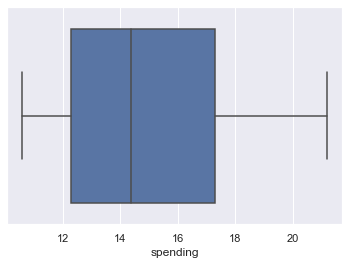

In [216]:
sns.boxplot(bank['spending']);

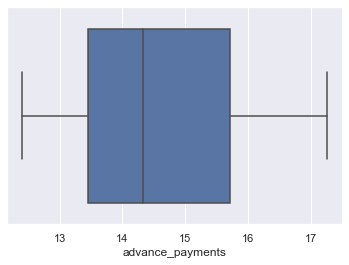

In [217]:
sns.boxplot(bank['advance_payments']);

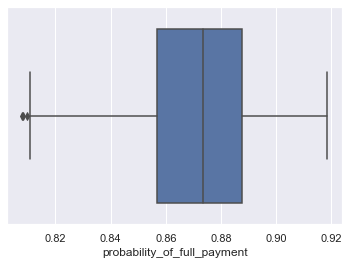

In [218]:
sns.boxplot(bank['probability_of_full_payment']);

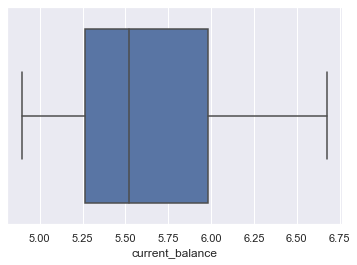

In [219]:
sns.boxplot(bank['current_balance']);

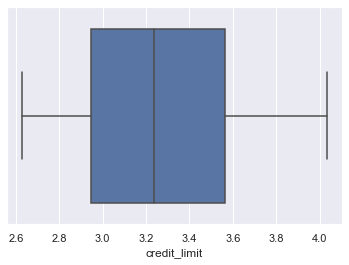

In [220]:
sns.boxplot(bank['credit_limit']);

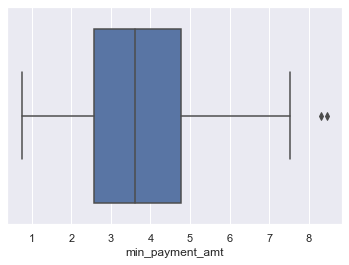

In [221]:
sns.boxplot(bank['min_payment_amt']);

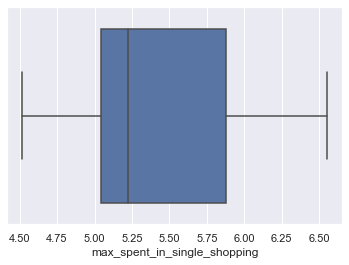

In [222]:
sns.boxplot(bank['max_spent_in_single_shopping']);

The Varibles namely 'min_payment_amt' and 'probability_of_full_payment' have outliers.

# Dealing with outliers

In [223]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [224]:
lrincome, urincome = remove_outliers(bank['probability_of_full_payment'])
bank['probability_of_full_payment'] = np.where(bank['probability_of_full_payment']>urincome, urincome, bank['probability_of_full_payment'])
bank['probability_of_full_payment'] = np.where(bank['probability_of_full_payment']< lrincome, lrincome, bank["probability_of_full_payment"])

lrtravel, urtravel = remove_outliers(bank["min_payment_amt"])
bank['min_payment_amt'] = np.where(bank['min_payment_amt']>urtravel, urtravel, bank['min_payment_amt'])
bank['min_payment_amt'] = np.where(bank['min_payment_amt']<lrtravel, lrtravel, bank['min_payment_amt'])

# Checking of treatement of outliers

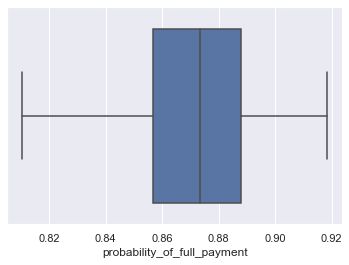

In [225]:
sns.boxplot(bank['probability_of_full_payment']);

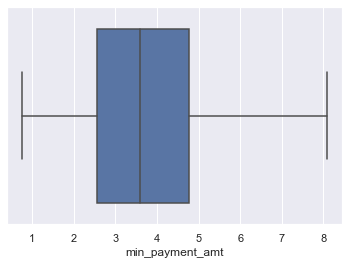

In [226]:
sns.boxplot(bank['min_payment_amt']);

Outliers are treated adequately

# Univariate Analysis with help of Histolgram

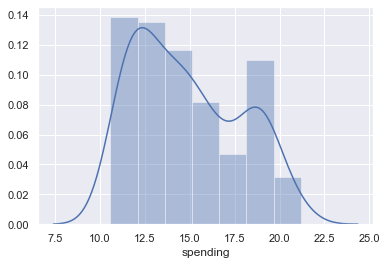

In [227]:
sns.distplot(bank['spending']);


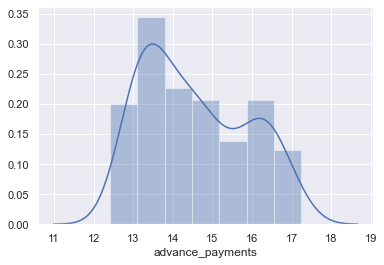

In [228]:
sns.distplot(bank['advance_payments']);

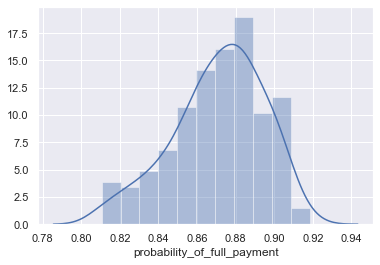

In [229]:
sns.distplot(bank['probability_of_full_payment']);

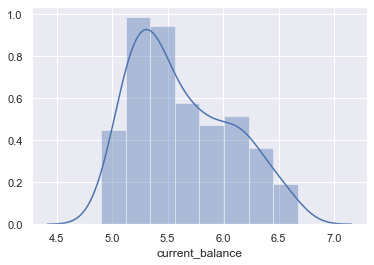

In [230]:
sns.distplot(bank['current_balance']);

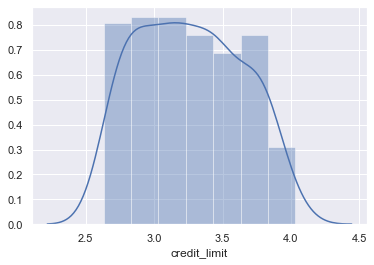

In [231]:
sns.distplot(bank['credit_limit']);

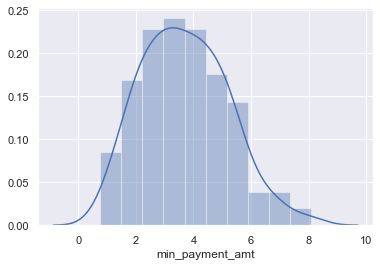

In [232]:
sns.distplot(bank['min_payment_amt']);

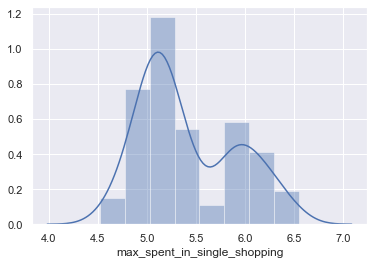

In [233]:
sns.distplot(bank['max_spent_in_single_shopping']);

# Byvariate Analysis using Scatter Plot

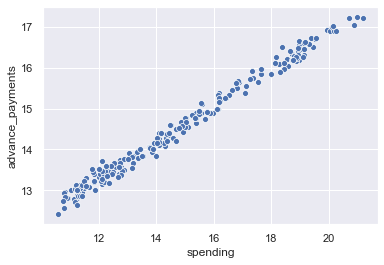

In [234]:
sns.scatterplot(bank['spending'], bank['advance_payments']);

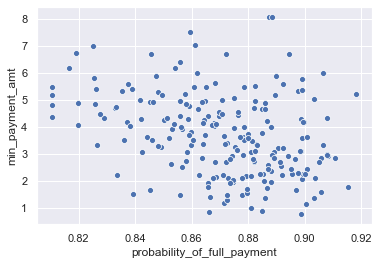

In [235]:
sns.scatterplot(bank['probability_of_full_payment'], bank['min_payment_amt']);

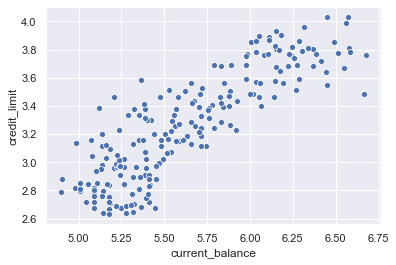

In [236]:
sns.scatterplot(bank['current_balance'], bank['credit_limit']);

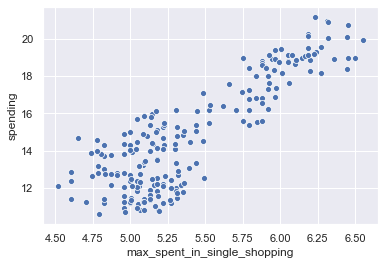

In [237]:
sns.scatterplot(bank['max_spent_in_single_shopping'], bank['spending']);

# Multivariate Analysis using Pair Plot

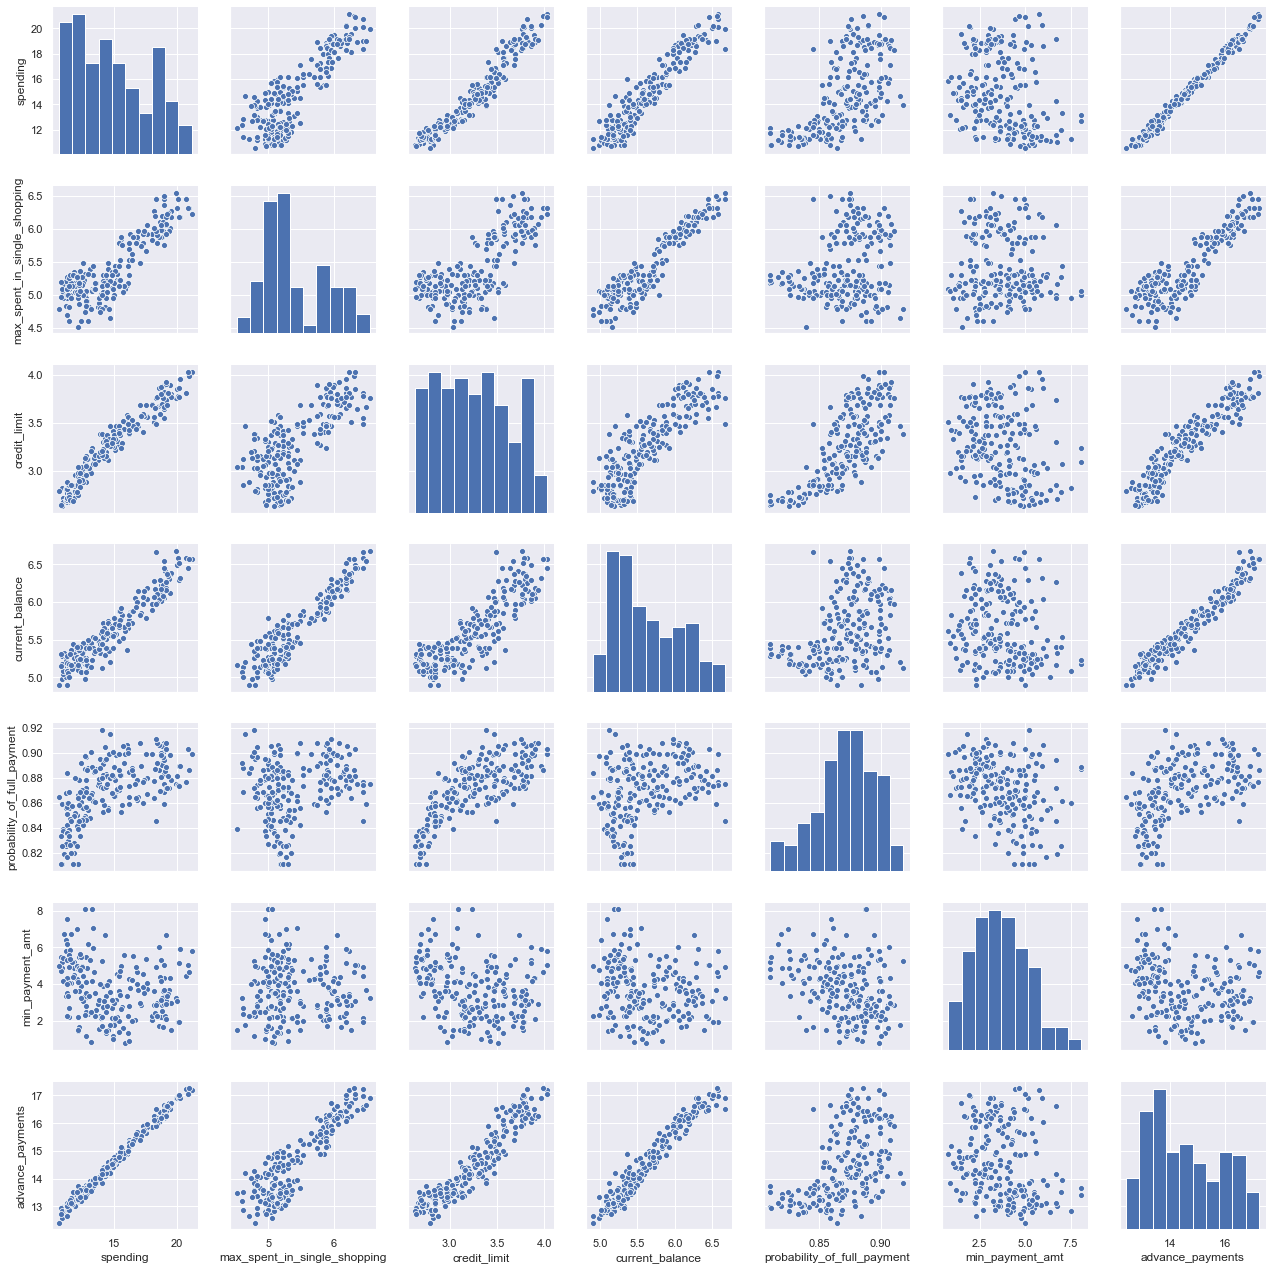

In [238]:
sns.pairplot(bank[['spending', 'max_spent_in_single_shopping', 'credit_limit','current_balance','probability_of_full_payment', 'min_payment_amt','advance_payments']]);

In [239]:
bank.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.522793
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.360001
max_spent_in_single_shopping    0.561897
dtype: float64

In [240]:
bank.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000555
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.234095
max_spent_in_single_shopping    0.241553
dtype: float64

In [241]:
bank.std()


spending                        2.909699
advance_payments                1.305959
probability_of_full_payment     0.023560
current_balance                 0.443063
credit_limit                    0.377714
min_payment_amt                 1.494689
max_spent_in_single_shopping    0.491480
dtype: float64

In [242]:
bank.cov()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,8.466351,3.778443,0.041742,1.224704,1.066911,-0.998633,1.235133
advance_payments,3.778443,1.705528,0.016305,0.562666,0.466065,-0.423684,0.571753
probability_of_full_payment,0.041742,0.016305,0.000555,0.003846,0.006783,-0.011799,0.002630
current_balance,1.224704,0.562666,0.003846,0.196305,0.143992,-0.113046,0.203125
credit_limit,1.066911,0.466065,0.006783,0.143992,0.142668,-0.146211,0.139068
min_payment_amt,-0.998633,-0.423684,-0.011799,-0.113046,-0.146211,2.234095,-0.007056
max_spent_in_single_shopping,1.235133,0.571753,0.002630,0.203125,0.139068,-0.007056,0.241553


In [243]:
bank.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


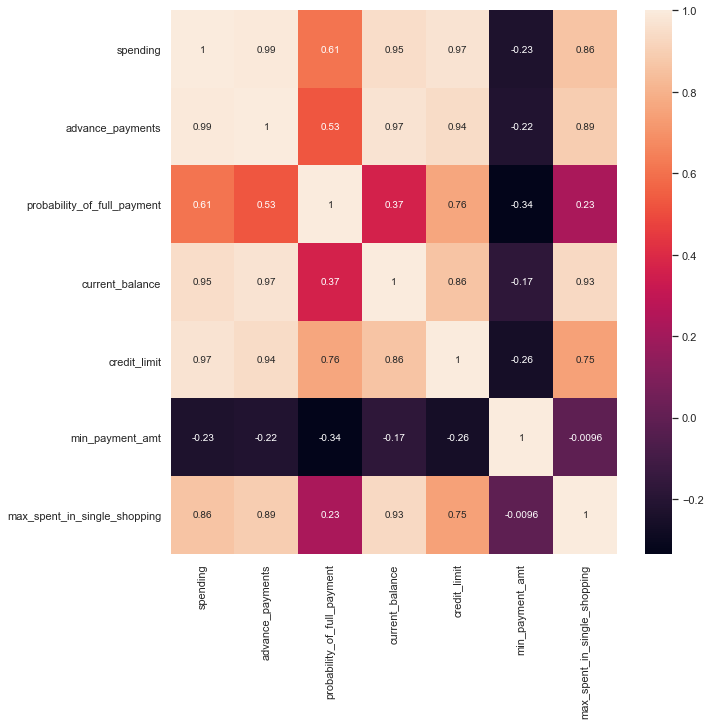

In [244]:
plt.figure(figsize = (10,10))
sns.heatmap(bank.corr(), annot = True);

# 1.2 Do you think scaling is necessary for clustering in this case? Justify

In [245]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


In [246]:
bank.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000555
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.234095
max_spent_in_single_shopping    0.241553
dtype: float64

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [447]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [252]:
wardlink = linkage(scaled_bank, method = 'ward')

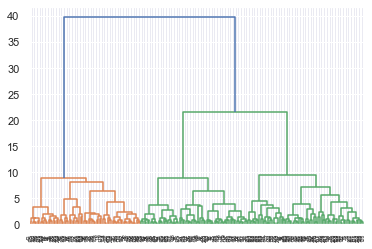

In [253]:
dend = dendrogram(wardlink)

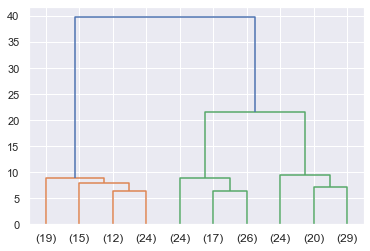

In [254]:
dend = dendrogram(wardlink, truncate_mode = 'lastp', p = 10)


In [255]:
from scipy.cluster.hierarchy import fcluster

In [256]:
## Method 1
clusters = fcluster(wardlink, 3, criterion = 'maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [257]:
## Method 2
clusters = fcluster(wardlink, 20, criterion = 'distance')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [258]:
bank['clusters'] = clusters

In [259]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [260]:
bank.to_csv('datamining1.csv')

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [449]:
from sklearn.cluster import KMeans

In [450]:
from sklearn.preprocessing import StandardScaler

In [451]:
X = StandardScaler()

In [452]:
scaled_bank = X.fit_transform(bank)

In [446]:
scaled_bank


array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [262]:
kmeans = scaled_bank
kmeans

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [263]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_bank)
k_means.inertia_

1469.9999999999998

In [264]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_bank)
k_means.inertia_

659.1474009548498

In [265]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_bank)
k_means.inertia_

430.298481751223

In [266]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_bank)
k_means.inertia_

370.69092922102

In [267]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_bank)
k_means.inertia_

326.1994177370155

In [268]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_bank)
k_means.inertia_

289.45524862464833

In [269]:
wss = []

In [270]:
for i in range (1,11):
    KM = KMeans(n_clusters = i)
    KM.fit(scaled_bank)
    wss.append(KM.inertia_)

In [271]:
wss

[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 370.8685962394206,
 326.7599530987671,
 289.56517471559164,
 263.70942970700014,
 239.91666513736092,
 225.18334544228065,
 204.94070663733393]

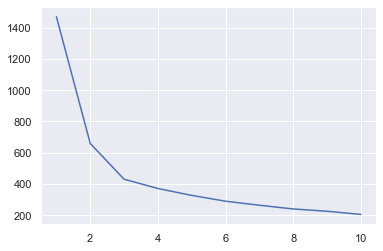

In [272]:
plt.plot(range(1,11), wss)

In [273]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_bank)
labels  = k_means.labels_

In [274]:
bank['cluster_KMeans'] = labels

In [275]:
bank.head(20)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,cluster_KMeans
0,19.94,16.92,0.875200,6.675,3.763,3.252000,6.550,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336000,5.144,3,2
2,18.95,16.42,0.882900,6.248,3.755,3.368000,6.148,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182000,5.185,2,0
4,17.99,15.86,0.899200,5.890,3.694,2.068000,5.837,1,1
5,12.70,13.41,0.887400,5.183,3.091,8.079625,5.000,2,0
6,12.02,13.33,0.850300,5.350,2.810,4.271000,5.308,2,0
7,13.74,14.05,0.874400,5.482,3.114,2.932000,4.825,3,2
8,18.17,16.26,0.863700,6.271,3.512,2.853000,6.273,1,1
9,11.23,12.88,0.851100,5.140,2.795,4.325000,5.003,2,0


In [276]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [277]:
silhouette_score(scaled_bank,labels)

0.3373662527862716

In [278]:
sil_width = silhouette_samples(scaled_bank,labels)

In [279]:
bank['sil_width'] = sil_width

In [434]:
bank.head(20)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,cluster_KMeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252000,6.550,1,1,0.471858
1,15.99,14.89,0.906400,5.363,3.582,3.336000,5.144,3,2,0.072772
2,18.95,16.42,0.882900,6.248,3.755,3.368000,6.148,1,1,0.493126
3,10.83,12.96,0.810588,5.278,2.641,5.182000,5.185,2,0,0.525418
4,17.99,15.86,0.899200,5.890,3.694,2.068000,5.837,1,1,0.153066
5,12.70,13.41,0.887400,5.183,3.091,8.079625,5.000,2,0,0.246963
6,12.02,13.33,0.850300,5.350,2.810,4.271000,5.308,2,0,0.478487
7,13.74,14.05,0.874400,5.482,3.114,2.932000,4.825,3,2,0.423018
8,18.17,16.26,0.863700,6.271,3.512,2.853000,6.273,1,1,0.264611
9,11.23,12.88,0.851100,5.140,2.795,4.325000,5.003,2,0,0.520027


In [281]:
bank.to_csv('datamining2.csv')

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

## Please refer the business report.

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check (3 pts), Interpret the inferences from the descriptive statistics in a detailed manner (2 pts).

Do the descriptive statistics and do null value condition check (3 pts),

In [404]:
os.chdir('C:\\Users\\Mitul\\Desktop')

In [405]:
insurance = pd.read_csv('Insurance_Part2.csv')

In [406]:
insurance.shape

(3000, 10)

In [407]:
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [438]:
insurance.duplicated().sum()

161

In [286]:
insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [287]:
insurance.mean()

Age          38.091000
Commision    14.529203
Duration     70.001333
Sales        60.249913
dtype: float64

In [288]:
insurance.median()


Age          36.00
Commision     4.63
Duration     26.50
Sales        33.00
dtype: float64

In [289]:
insurance.mode()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,36,EPX,Travel Agency,No,0.0,Online,8,20.0,Customised Plan,ASIA


In [290]:
insurance.describe()


,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [291]:
insurance.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

In [292]:
insurance.quantile(q = 0.75) - insurance.quantile(q = 0.50)

Age           6.000
Commision    12.605
Duration     36.500
Sales        36.000
dtype: float64

In [293]:
insurance.quantile(q = 0.25)

Age          32.0
Commision     0.0
Duration     11.0
Sales        20.0
Name: 0.25, dtype: float64

In [294]:
insurance.quantile(q = 0.50)

Age          36.00
Commision     4.63
Duration     26.50
Sales        33.00
Name: 0.5, dtype: float64

In [295]:
insurance.std()

Age           10.463518
Commision     25.481455
Duration     134.053313
Sales         70.733954
dtype: float64

In [296]:
insurance.var()


Age            109.485214
Commision      649.304524
Duration     17970.290762
Sales         5003.292182
dtype: float64

In [435]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Commision     3000 non-null   float64
 4   Channel       3000 non-null   object 
 5   Duration      3000 non-null   int64  
 6   Sales         3000 non-null   float64
 7   Product Name  3000 non-null   object 
 8   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 211.1+ KB


# 2.2 and 2.3 
2.2
Data Split: Split the data into test and train (1.5 pts), build classification model CART (2 pts), Random Forest (2 pts), Artificial Neural Network(2 pts).
2.3 
Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

# CART MODEL WITH PERFORMANCE METRICS

In [297]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [298]:
from sklearn.tree import DecisionTreeClassifier 

In [299]:
## Indepndent Variables are object types therefore it have to be transferred in to integer data type.
## Decision Tree does not require any transformation but this transformation is required due to limitation of python.

for feature in insurance.columns:
    if insurance[feature].dtype =='object':
        insurance[feature] = pd.Categorical(insurance[feature]).codes

In [300]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [301]:
# Sepration of dependent and independent variable - Training 70% and Testing 30%

X = insurance.drop(['Claimed', 'Agency_Code'], axis = 1)

Y = insurance.pop('Claimed')

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
x_train, x_test, train_lables, test_lables = train_test_split(X,Y, test_size = .30, random_state = 1)

In [304]:
insurance_model = DecisionTreeClassifier(criterion = 'gini')

In [305]:
## fiting model with independent and dependent training dataset
insurance_model.fit(x_train, train_lables)

DecisionTreeClassifier()

In [306]:
## visualisaiton of Decision Tree
from sklearn import tree

In [307]:
train_char_lable = ['NO', 'Yes']

In [308]:
Insurance_Tree_file = open('d:\\Insurance_tree.dot', 'w')

In [309]:
dot_data = tree.export_graphviz(insurance_model, out_file = Insurance_Tree_file, feature_names = list(x_train), class_names= train_char_lable)

In [310]:
Insurance_Tree_file.close()

In [311]:
reg_insurance_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, min_samples_leaf = 10, min_samples_split = 30)

In [312]:
reg_insurance_model.fit(x_train, train_lables)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [313]:
insurance_tree_regularized = open('d:\\insurance_tree_regularized.dot', 'w')

In [314]:
dot_data = tree.export_graphviz(reg_insurance_model, out_file = insurance_tree_regularized, feature_names = list(x_train), class_names= train_char_lable)

In [315]:
insurance_tree_regularized.close()

In [316]:
reg_insurance_model.feature_importances_

array([0.04383888, 0.        , 0.26539552, 0.        , 0.04606136,
       0.15909264, 0.47838293, 0.00722868])

In [317]:
print(pd.DataFrame(insurance_model.feature_importances_, columns=['Important'], index = x_train.columns))

              Important
Age            0.194884
Type           0.000000
Commision      0.146529
Channel        0.008256
Duration       0.260139
Sales          0.187119
Product Name   0.179297
Destination    0.023776


In [337]:
## Method 1

ytrain_predict1 = reg_insurance_model.predict(x_train)
ytest_predict1 = reg_insurance_model.predict(x_test)

In [338]:
## Method 2

ytrain_predict2 = reg_insurance_model.predict_proba(x_train)
ytest_predict2 = reg_insurance_model.predict_proba(x_test)

In [339]:
## Model Performance
import matplotlib.pyplot as plt

In [340]:
probs = reg_insurance_model.predict_proba(x_train)


In [341]:
probs = reg_insurance_model.predict_proba(x_train)

In [342]:
probs = probs[:,1]

In [343]:
from sklearn.metrics import roc_auc_score

In [344]:
auc = roc_auc_score(train_lables, probs)

In [345]:
auc

0.6603750949734075

In [346]:
from sklearn.metrics import roc_curve

In [347]:
fpr, tpr, thresholds = roc_curve(train_lables, probs)

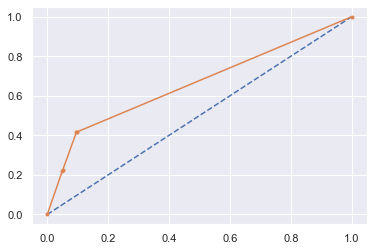

In [348]:
plt.plot([0, 1], [0,1], linestyle = '--')
plt.plot(fpr, tpr, marker= '.')
plt.show()

In [351]:
probs = reg_insurance_model.predict_proba(x_test)

In [352]:
probs = probs[:, 1]

In [353]:
auc = roc_auc_score(test_lables, probs)

In [354]:
auc

0.6546827286734836

In [355]:
fpr, tpr, thresholds = roc_curve(test_lables, probs)

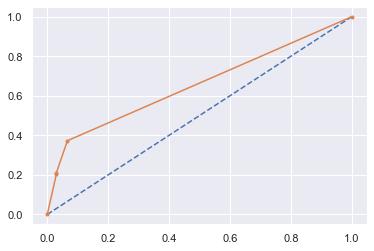

In [356]:
plt.plot([0, 1], [0,1], linestyle = '--')
plt.plot(fpr, tpr, marker= '.')
plt.show()

In [357]:
from sklearn.metrics import classification_report,confusion_matrix

In [365]:
print(classification_report(train_lables, ytrain_predict1))


              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1471
           1       0.00      0.00      0.00       629

    accuracy                           0.70      2100
   macro avg       0.35      0.50      0.41      2100
weighted avg       0.49      0.70      0.58      2100



C:\Users\Mitul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [366]:
print(classification_report(test_lables, ytest_predict1))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       605
           1       0.00      0.00      0.00       295

    accuracy                           0.67       900
   macro avg       0.34      0.50      0.40       900
weighted avg       0.45      0.67      0.54       900



In [367]:
confusion_matrix(train_lables, ytrain_predict1)

array([[1471,    0],
       [ 629,    0]], dtype=int64)

In [368]:
confusion_matrix(test_lables, ytest_predict1)


array([[605,   0],
       [295,   0]], dtype=int64)

In [369]:
reg_insurance_model.score(x_train, train_lables)

0.7004761904761905

In [363]:
reg_insurance_model.score(x_test, test_lables)

0.6722222222222223

# ENSEMBLE RANDOM FOREST CLASSIFIER WITH PERFORMANCE METRIC

In [370]:
from sklearn.ensemble import RandomForestClassifier

In [371]:
rfcl = RandomForestClassifier(n_estimators = 750)
rfcl = rfcl.fit(x_train, train_lables)

In [372]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5,10],
    'max_features': [4, 8],
    'min_samples_leaf': [100, 300],
    'min_samples_split': [250, 500],
    'n_estimators': [501, 1001]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [373]:
grid_search.fit(x_train, train_lables)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10], 'max_features': [4, 8],
                         'min_samples_leaf': [100, 300],
                         'min_samples_split': [250, 500],
                         'n_estimators': [501, 1001]})

In [374]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 500,
 'n_estimators': 1001}

In [377]:
best_grid = grid_search.best_estimator_

In [378]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [379]:
## Model Performance
from sklearn.metrics import confusion_matrix,classification_report

In [380]:
confusion_matrix(train_lables,ytrain_predict)

array([[1348,  123],
       [ 363,  266]], dtype=int64)

In [382]:
confusion_matrix(test_lables,ytest_predict)

array([[568,  37],
       [186, 109]], dtype=int64)

In [439]:
print(classification_report(train_lables,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1471
           1       0.68      0.42      0.52       629

    accuracy                           0.77      2100
   macro avg       0.74      0.67      0.68      2100
weighted avg       0.76      0.77      0.75      2100



In [440]:
print(classification_report(test_lables,ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84       605
           1       0.75      0.37      0.49       295

    accuracy                           0.75       900
   macro avg       0.75      0.65      0.67       900
weighted avg       0.75      0.75      0.72       900



AUC: 0.799


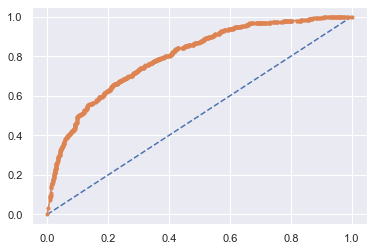

In [383]:
# AUC and ROC for the test data
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_lables, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_lables, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.777


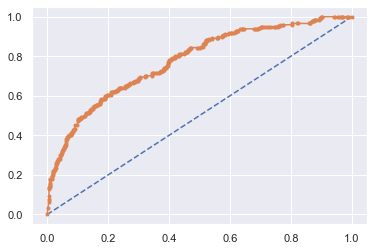

In [384]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_lables, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_lables, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# ARTIFICIAL NEURAL NETWORK WITH PERFORMANCE METRICS

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.neural_network import MLPClassifier

In [392]:
os.getcwd()

'C:\\Users\\Mitul\\Desktop'

In [393]:
os.chdir("C:\\Users\\Mitul\\Desktop")

In [400]:
insurance1 = pd.read_csv('insurance_part2_data.csv')

In [401]:
insurance1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [402]:
insurance1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [408]:
# Indepndent Variables are object types therefore it have to be transferred in to integer data type.
## Decision Tree does not require any transformation but this transformation is required due to limitation of python.

for feature in insurance1.columns:
    if insurance1[feature].dtype =='object':
        insurance1[feature] = pd.Categorical(insurance1[feature]).codes

In [409]:
insurance1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [412]:
X = insurance1.drop(['Claimed', 'Agency_Code'], axis = 1)

Y = insurance1.pop('Claimed')

In [414]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.30, random_state=1)

In [415]:
from sklearn.preprocessing import StandardScaler

In [416]:
sc = StandardScaler()

In [417]:
x_train = sc.fit_transform(x_train)

In [418]:
x_train

array([[-0.19192502,  0.80520286, -0.58095364, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.80520286, -0.58095364, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.24192306,  1.21614611, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.80520286, -0.58095364, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151, -1.24192306, -0.33986062, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.24192306, -0.36550067, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [419]:
x_test = sc.transform(x_test)

In [420]:
x_test

array([[-1.55684893,  0.80520286,  0.50970528, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.24192306, -0.32723194, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.24192306, -0.42787871, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.24192306, -0.32263969, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434, -1.24192306, -0.17913193, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958, -1.24192306, -0.23270816, ..., -0.49016794,
        -1.34097044, -0.43926017]])

In [421]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)


In [424]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.71655709
Iteration 2, loss = 0.69166660
Iteration 3, loss = 0.66371905
Iteration 4, loss = 0.63837295
Iteration 5, loss = 0.61755451
Iteration 6, loss = 0.60089652
Iteration 7, loss = 0.58703678
Iteration 8, loss = 0.57592429
Iteration 9, loss = 0.56629305
Iteration 10, loss = 0.55861291
Iteration 11, loss = 0.55172732
Iteration 12, loss = 0.54617632
Iteration 13, loss = 0.54121296
Iteration 14, loss = 0.53699739
Iteration 15, loss = 0.53327497
Iteration 16, loss = 0.53001745
Iteration 17, loss = 0.52705257
Iteration 18, loss = 0.52455836
Iteration 19, loss = 0.52227141
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [425]:
from sklearn.metrics import confusion_matrix,classification_report

In [426]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[585,  20],
       [214,  81]], dtype=int64)

In [427]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train,pred2)

array([[1406,   65],
       [ 446,  183]], dtype=int64)

In [428]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       605
           1       0.80      0.27      0.41       295

    accuracy                           0.74       900
   macro avg       0.77      0.62      0.62       900
weighted avg       0.76      0.74      0.69       900



In [429]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1471
           1       0.74      0.29      0.42       629

    accuracy                           0.76      2100
   macro avg       0.75      0.62      0.63      2100
weighted avg       0.75      0.76      0.72      2100



In [430]:
import matplotlib.pyplot as plt

AUC: 0.783


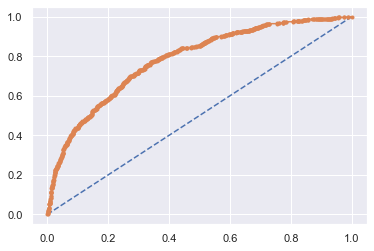

In [432]:
#AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.756


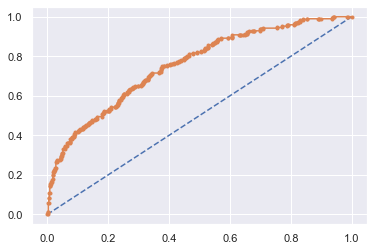

In [433]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# END OF ASSIGNMENT